# Example Notebook: Numerical Simulation of Biofilm Growth 
## A project by the iGEM Teams of Hannover and Darmstadt
***
This notebook shows how to run a biofilm growth simulation by using the framework we implemented as part of our iGEM project in 2020. We suggest to go through the different steps presented in this notebook before starting your on model. The code still in development and you may encounter bugs.
We note, that the development is still in progress and invite you kindly to contribute to our Git!

### 1. Step: Setting the constants
****
Before we start of with the simulation, we have to make sure that the working directory is set right. This step is needed for specifying where your output should go and where the source code is stored. Change it with ``os.chdir(path)`` and replace ``path`` with the path to where the src folder is stored, if the output below doesnt match or you run into import errors

In [26]:
import os
os.getcwd()
# os.chdir('')

'C:\\Users\\David\\PycharmProjects\\biofilm_modelling'

Now we import our custom _Constants_ Class. By passing the desired Bacteria strain, we can select which bacteria is used in the simulation. Here we use Bacillus subtilis.

In [2]:
from src.constants import Constants
constants = Constants(bac_type="B.Sub.")

Now we set the constants for the simulation. We set the number of bacteria at the start to 5 and 
the duration of the simulation to 5 minutes. Before setting the constants by yourself, make sure to check out the documentation for the right units! But you can always use the default values.

In [3]:
constants.num_initial_bac = 3
constants.duration = 5

We freeze the simulation constants by calling three set functions.

In [4]:
constants.set_paths()
constants.set_simulation_constants()
constants.set_bacteria_constants()

Confirm the constants by printing some of them ... 

In [5]:
constants.get_paths()

{'root': WindowsPath('C:/Users/David/PycharmProjects/biofilm_modelling'),
 'output': WindowsPath('C:/Users/David/PycharmProjects/biofilm_modelling/output'),
 'info': WindowsPath('C:/Users/David/PycharmProjects/biofilm_modelling/output/log_13102020_21h6min/log_13102020_21h6min.json')}

In [6]:
constants.get_simulation_constants()

{'num_initial': 3, 'time_step': 1, 'window_size': (450, 900), 'duration': 5}

In [7]:
constants.get_bac_constants()

{'LENGTH': 2.5276078666716466,
 'WIDTH': 1,
 'MASS': 1e-12,
 'MORTALITY_RATE': 0.0,
 'CRITICAL_LENGTH': 4.7,
 'FREE_MEAN_SPEED': 1.5,
 'DOUBLING_TIME': 7200,
 'GROWTH_RATE': 0.0007042253521126761,
 'MOTION_ACTIVATION_PROBABILITY': 0.005,
 'MOTION_DEACTIVATION_PROBABILITY': 0.01}

### 2. Initializing the Biofilm
***
The simulation is managed by the Biofilm class. Each Biofilm consits of Bacteria, which are represented as rigid-bodies with biological and physical parameters. The behaviour of the Bacteria is implemented in the Bacteria class. But you don't have to care about that right now, because the code will take care of the initial configuration of bacteria by default. <br> 
After importing the biofilm module we pass the above defined constants to the Biofilm. 

In [8]:
from src.biofilm import Biofilm

In [9]:
biofilm = Biofilm()
biofilm.constants = constants

### 3. Starting the simulation
*** 
When calling the simulate function, you will need to pass a path in which the data is stored. We do this by using the default path, set by the Constants class.

In [11]:
info_file_path = constants.get_paths(key='info')

Before we start the simulation, we can again get an overview of the used constants and paths.

In [12]:
print(constants)


 ******  PATHS   ******
 root :   C:\Users\David\PycharmProjects\biofilm_modelling
output :   C:\Users\David\PycharmProjects\biofilm_modelling\output
info :   C:\Users\David\PycharmProjects\biofilm_modelling\output\log_13102020_21h6min\log_13102020_21h6min.json

 ******  CONSTANTS   ******
   (check documentation for units)

 * Constants of B.Sub. *
LENGTH :   2.5276078666716466
WIDTH :   1
MASS :   1e-12
MORTALITY_RATE :   0.0
CRITICAL_LENGTH :   4.7
FREE_MEAN_SPEED :   1.5
DOUBLING_TIME :   7200
GROWTH_RATE :   0.0007042253521126761
MOTION_ACTIVATION_PROBABILITY :   0.005
MOTION_DEACTIVATION_PROBABILITY :   0.01

 * Simulation constant *
num_initial :   3
time_step :   1
window_size :   (450, 900)
duration :   5



An finally we start of with the simulation ... 

In [13]:
biofilm.simulate(save_name=info_file_path)

  2%|█▉                                                                                | 7/300 [00:00<00:04, 61.95it/s]


 ********* STARTING MODELLING  ********* 
  * Simulation running for 5 min in steps of 1 s.


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:36<00:00,  8.16it/s]

Duration of simulate : 36.77380347251892 s


### 3. Plotting the results
***
To visualize the behaviour of the bacteria inside the Biofilm we provide a variety of function to acess the stored data and use is for plotting. To acess the data from the log file, we use the function bacteria_to_pandas(), which returns all of the data as a handy pandas array, and pass the path of the info file.

In [14]:
from src.utils import bacteria_as_pandas
data = bacteria_as_pandas(info_file_path)

We import more functions for visualisation and just need to pass the data and a path at which we want to store the graphs. 
We will use the path of our info file. TODOOOOO But for convience, we will show the plots here immediatly.

In [19]:
%matplotlib inline
from src.utils import plot_sizes, plot_force, plot_velocities, animate_positions, plot_num, dens_map


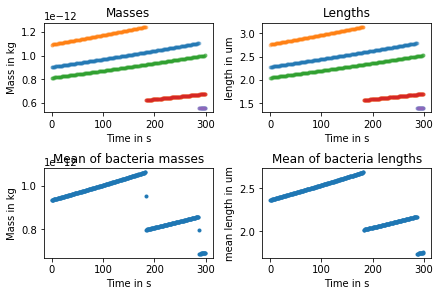

In [20]:
plot_sizes(data, info_file_path, save_fig=False)

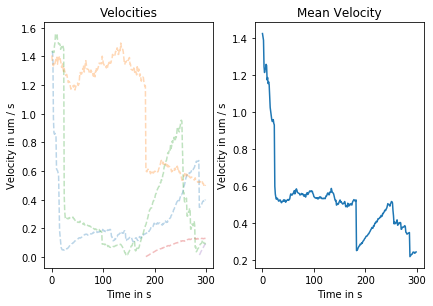

In [18]:
plot_velocities(data, info_file_path, save_fig=False)

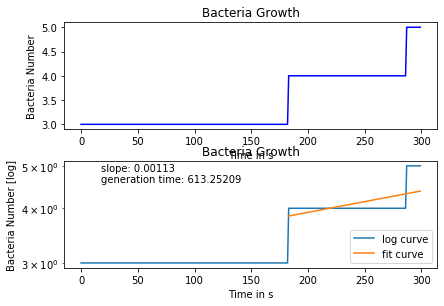

In [22]:
plot_num(data, info_file_path, save_fig=False)

C:\Users\David\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'thresh'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


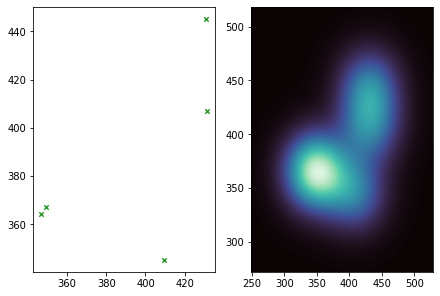

In [23]:
dens_map(data, info_file_path, save_fig=False)

ANIMATION UNFORTUNALY NOT WORK WITH THE CURRENT FUNCTION. Return anim and cast HTML(anim.to_jshtml())